In [1]:
# unsupervised learning 非監督式學習
# 非監督式學習與監督式學習最大的不同之處就在於它的訓練資料是沒有標籤（答案）的

In [2]:
#=======================================
# K Means
#=======================================

from sklearn import cluster, datasets

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters=3).fit(iris_X)

# 印出分群結果
cluster_labels = kmeans_fit.labels_
print('分群結果: ')
print(cluster_labels)
print('----------')

# 印出品種
iris_y = iris.target
print('真實品種: ')
print(iris_y)

分群結果: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
----------
真實品種: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 績效
# 分群演算法的績效可以使用 Silhouette 係數
# 或 WSS（Within Cluster Sum of Squares）/BSS（Between Cluster Sum of Squares）。

In [4]:
from sklearn import metrics

silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

# The Silhouette Coefficient 
# is calculated using the mean intra-cluster distance (a) 
# and the mean nearest-cluster distance (b) for each sample. 
# The Silhouette Coefficient for a sample is (b - a) / max(a, b). 
# The best value is 1 and the worst value is -1.

0.5528190123564091


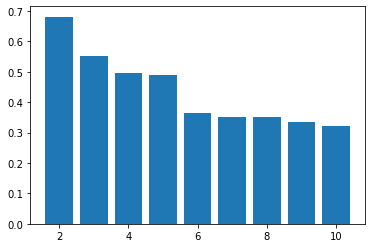

[0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.4887488870931048, 0.3648340039670018, 0.35200746716162806, 0.35006029596867255, 0.33320548144733225, 0.32144951127561805]


In [5]:
# 如何選擇 K (cluster 數目)
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris_X = iris.data

silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [12]:
#=======================================
# Hierarchical Clustering
#=======================================

from sklearn import cluster, datasets, metrics

iris = datasets.load_iris()
iris_X = iris.data

# hierarchical clustering
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3)

# 印出分群結果
hclust.fit(iris_X)
cluster_labels = hclust.labels_
print('Clustering: \n', cluster_labels)
print('----------')

# 印出真實品種
iris_y = iris.target
print('Real Species: \n',iris_y)

Clustering: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
----------
Real Species: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
# 績效
hclust.fit(iris_X)
cluster_labels = hclust.labels_
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.5543236611296415
